# EX 2 -  Data Preprocessing

Install dependencies

In [4]:
%pip install pandas numpy matplotlib seaborn kagglehub

  Obtaining dependency information for kagglehub from https://files.pythonhosted.org/packages/6a/26/848411b6bef16d21d5132669cde3ff1ec018ebae601ea733a8d4a093a40e/kagglehub-0.4.1-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/69.1 kB ? eta -:--:--
   ----------------- ---------------------- 30.7/69.1 kB 1.3 MB/s eta 0:00:01
   ----------------------------------- ---- 61.4/69.1 kB 1.1 MB/s eta 0:00:01
   ----------------------------------- ---- 61.4/69.1 kB 1.1 MB/s eta 0:00:01
   ---------------------------------------- 69.1/69.1 kB 535.4 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Loading Dataset

In [6]:
import kagglehub
import pandas as pd
from kagglehub import KaggleDatasetAdapter

file_path = "data.csv"

df = kagglehub.load_dataset(
    KaggleDatasetAdapter.PANDAS,
    "shriyashjagtap/indian-personal-finance-and-spending-habits",
    file_path,
)

df.head(5)


C:\Users\admin\AppData\Local\Temp\ipykernel_9984\820926656.py:7: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


100%|██████████| 8.23M/8.23M [00:03<00:00, 2.52MB/s]


,Income,Age,Dependents,Occupation,City_Tier,Rent,Loan_Repayment,Insurance,Groceries,Transport,...,Desired_Savings,Disposable_Income,Potential_Savings_Groceries,Potential_Savings_Transport,Potential_Savings_Eating_Out,Potential_Savings_Entertainment,Potential_Savings_Utilities,Potential_Savings_Healthcare,Potential_Savings_Education,Potential_Savings_Miscellaneous
0,44637.249636,49,0,Self_Employed,Tier_1,13391.174891,0.000000,2206.490129,6658.768341,2636.970696,...,6200.537192,11265.627707,1685.696222,328.895281,465.769172,195.151320,678.292859,67.682471,0.000000,85.735517
1,26858.596592,34,2,Retired,Tier_2,5371.719318,0.000000,869.522617,2818.444460,1543.018778,...,1923.176434,9676.818733,540.306561,119.347139,141.866089,234.131168,286.668408,6.603212,56.306874,97.388606
2,50367.605084,35,1,Student,Tier_3,7555.140763,4612.103386,2201.800050,6313.222081,3221.396403,...,7050.360422,13891.450624,1466.073984,473.549752,410.857129,459.965256,488.383423,7.290892,106.653597,138.542422
3,101455.600247,21,0,Self_Employed,Tier_3,15218.340037,6809.441427,4889.418087,14690.149363,7106.130005,...,16694.965136,31617.953615,1875.932770,762.020789,1241.017448,320.190594,1389.815033,193.502754,0.000000,296.041183
4,24875.283548,52,4,Professional,Tier_2,4975.056710,3112.609398,635.907170,3034.329665,1276.155163,...,1874.099434,6265.700532,788.953124,68.160766,61.712505,187.173750,194.117130,47.294591,67.388120,96.557076


In [7]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 27 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Income                           20000 non-null  float64
 1   Age                              20000 non-null  int64  
 2   Dependents                       20000 non-null  int64  
 3   Occupation                       20000 non-null  str    
 4   City_Tier                        20000 non-null  str    
 5   Rent                             20000 non-null  float64
 6   Loan_Repayment                   20000 non-null  float64
 7   Insurance                        20000 non-null  float64
 8   Groceries                        20000 non-null  float64
 9   Transport                        20000 non-null  float64
 10  Eating_Out                       20000 non-null  float64
 11  Entertainment                    20000 non-null  float64
 12  Utilities                    

In [9]:
#Idenfying Missing Values

df.isnull().sum()

Income                             0
Age                                0
Dependents                         0
Occupation                         0
City_Tier                          0
Rent                               0
Loan_Repayment                     0
Insurance                          0
Groceries                          0
Transport                          0
Eating_Out                         0
Entertainment                      0
Utilities                          0
Healthcare                         0
Education                          0
Miscellaneous                      0
Desired_Savings_Percentage         0
Desired_Savings                    0
Disposable_Income                  0
Potential_Savings_Groceries        0
Potential_Savings_Transport        0
Potential_Savings_Eating_Out       0
Potential_Savings_Entertainment    0
Potential_Savings_Utilities        0
Potential_Savings_Healthcare       0
Potential_Savings_Education        0
Potential_Savings_Miscellaneous    0
d

In [11]:
#Handling missing values with median
#df.fillna(df.median(numeric_only=True),inplace=True)

In [14]:
#Remove Dupes

df.duplicated().sum
#df.drop_duplicates(inplace=True)

<bound method Series.sum of 0        False
1        False
2        False
3        False
4        False
         ...  
19995    False
19996    False
19997    False
19998    False
19999    False
Length: 20000, dtype: bool>

In [16]:
#Verify Datatypes

df.dtypes

Income                             float64
Age                                  int64
Dependents                           int64
Occupation                             str
City_Tier                              str
Rent                               float64
Loan_Repayment                     float64
Insurance                          float64
Groceries                          float64
Transport                          float64
Eating_Out                         float64
Entertainment                      float64
Utilities                          float64
Healthcare                         float64
Education                          float64
Miscellaneous                      float64
Desired_Savings_Percentage         float64
Desired_Savings                    float64
Disposable_Income                  float64
Potential_Savings_Groceries        float64
Potential_Savings_Transport        float64
Potential_Savings_Eating_Out       float64
Potential_Savings_Entertainment    float64
Potential_S

Feature Selection


In [17]:
num_df = df.select_dtypes(include=['int64','float64'])
num_df.head()

,Income,Age,Dependents,Rent,Loan_Repayment,Insurance,Groceries,Transport,Eating_Out,Entertainment,...,Desired_Savings,Disposable_Income,Potential_Savings_Groceries,Potential_Savings_Transport,Potential_Savings_Eating_Out,Potential_Savings_Entertainment,Potential_Savings_Utilities,Potential_Savings_Healthcare,Potential_Savings_Education,Potential_Savings_Miscellaneous
0,44637.249636,49,0,13391.174891,0.000000,2206.490129,6658.768341,2636.970696,1651.801726,1536.184255,...,6200.537192,11265.627707,1685.696222,328.895281,465.769172,195.151320,678.292859,67.682471,0.000000,85.735517
1,26858.596592,34,2,5371.719318,0.000000,869.522617,2818.444460,1543.018778,649.378103,1050.241738,...,1923.176434,9676.818733,540.306561,119.347139,141.866089,234.131168,286.668408,6.603212,56.306874,97.388606
2,50367.605084,35,1,7555.140763,4612.103386,2201.800050,6313.222081,3221.396403,1513.814376,1723.306926,...,7050.360422,13891.450624,1466.073984,473.549752,410.857129,459.965256,488.383423,7.290892,106.653597,138.542422
3,101455.600247,21,0,15218.340037,6809.441427,4889.418087,14690.149363,7106.130005,5040.249158,2858.194240,...,16694.965136,31617.953615,1875.932770,762.020789,1241.017448,320.190594,1389.815033,193.502754,0.000000,296.041183
4,24875.283548,52,4,4975.056710,3112.609398,635.907170,3034.329665,1276.155163,692.827225,660.186852,...,1874.099434,6265.700532,788.953124,68.160766,61.712505,187.173750,194.117130,47.294591,67.388120,96.557076


In [20]:
selected_features = [
    'Income',
    'Entertainment',
    'Utilities',
    'Healthcare',
    'Education',
    'Desired_Savings'
]

num_df = num_df[selected_features]
num_df.head()

,Income,Entertainment,Utilities,Healthcare,Education,Desired_Savings
0,44637.249636,1536.184255,2911.792231,1546.914539,0.000000,6200.537192
1,26858.596592,1050.241738,1626.143346,1137.351325,1551.723167,1923.176434
2,50367.605084,1723.306926,3368.457108,2178.515847,3160.026299,7050.360422
3,101455.600247,2858.194240,6128.550387,4571.118217,0.000000,16694.965136
4,24875.283548,660.186852,1092.689024,1169.095816,1445.215694,1874.099434


Data Visualization  

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


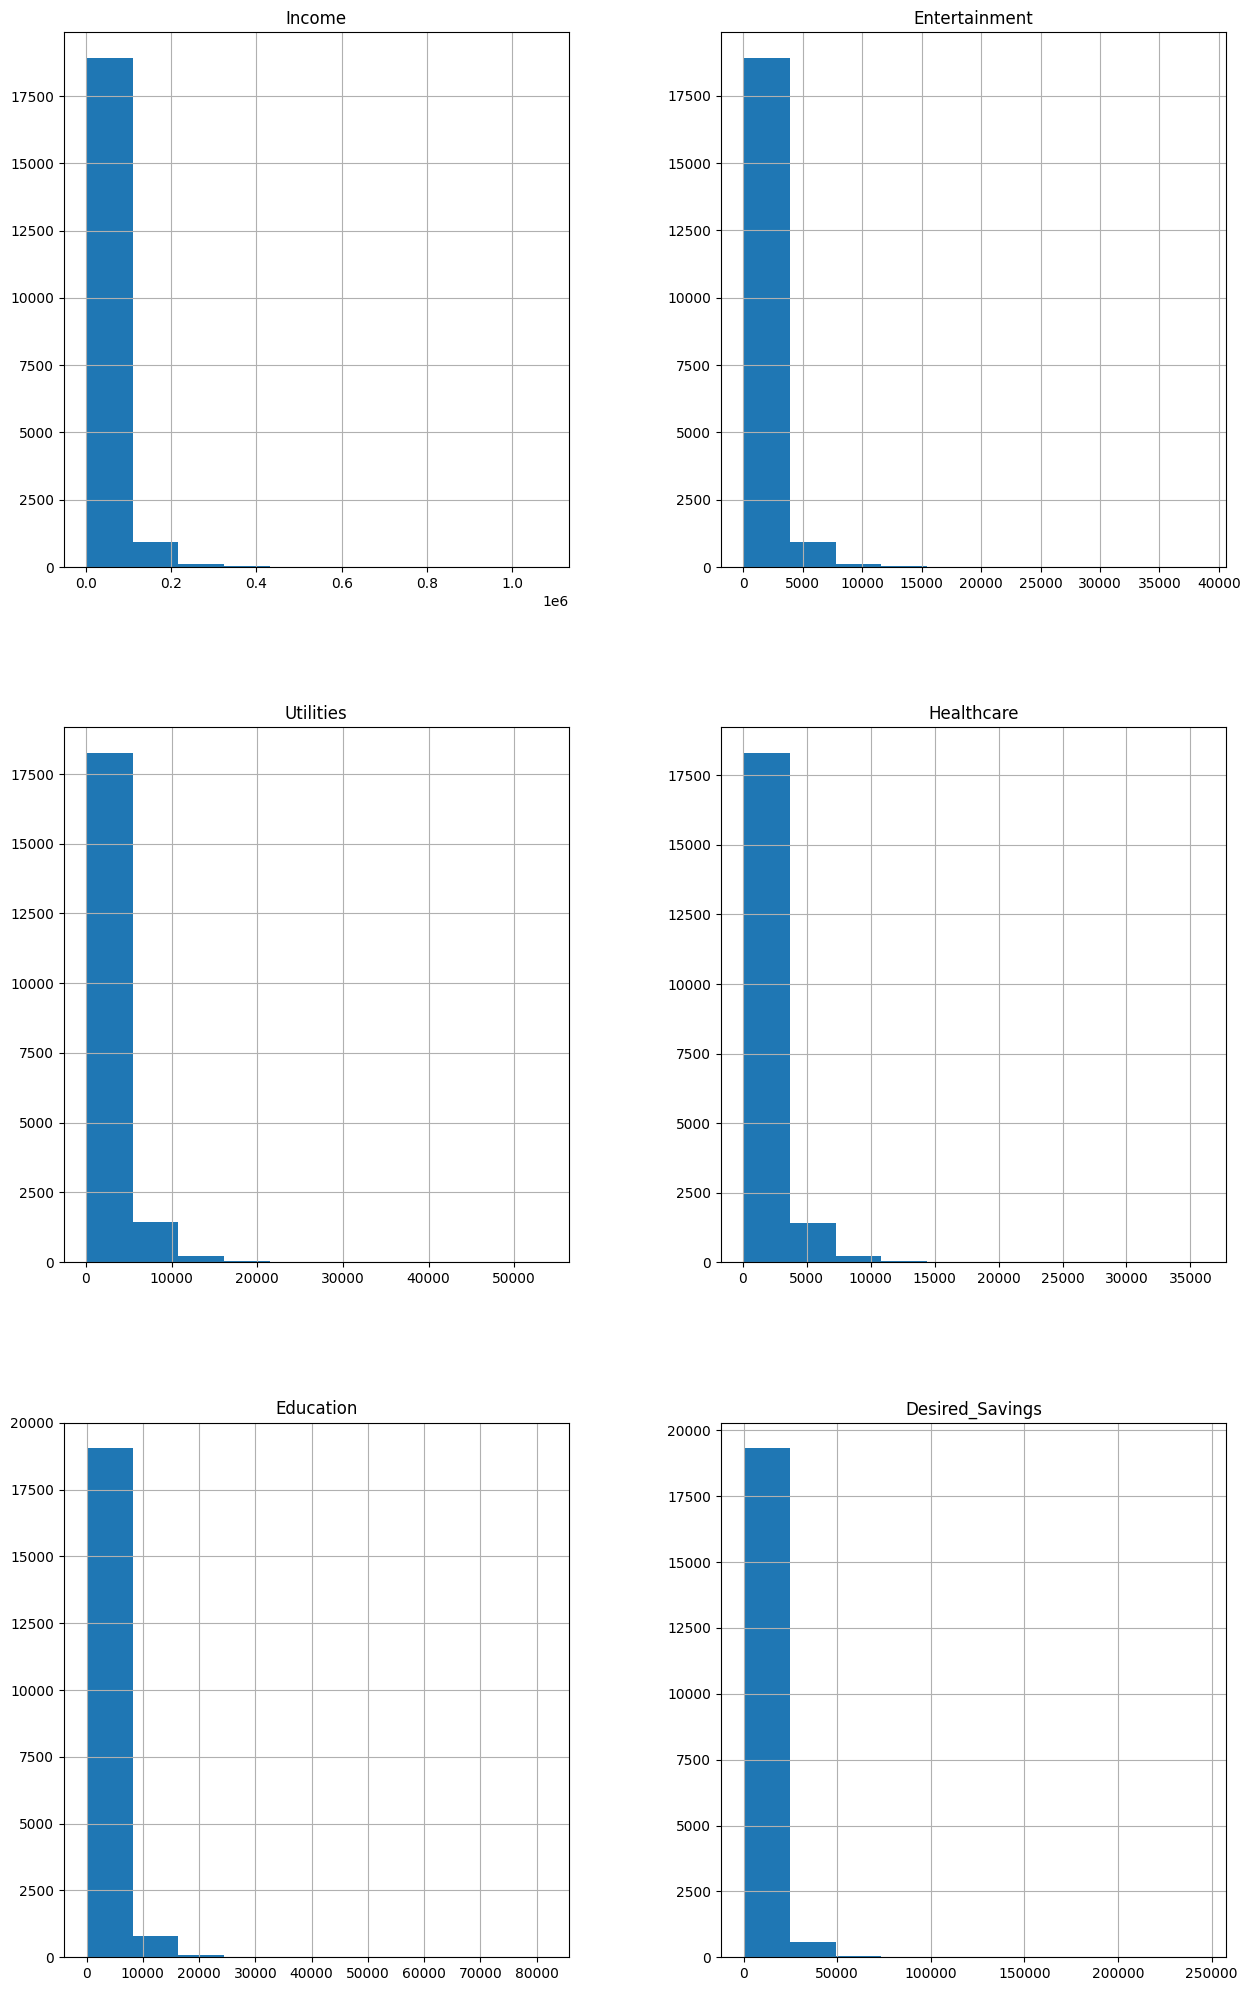

In [24]:
num_df.hist(figsize=(15,25))
plt.show()

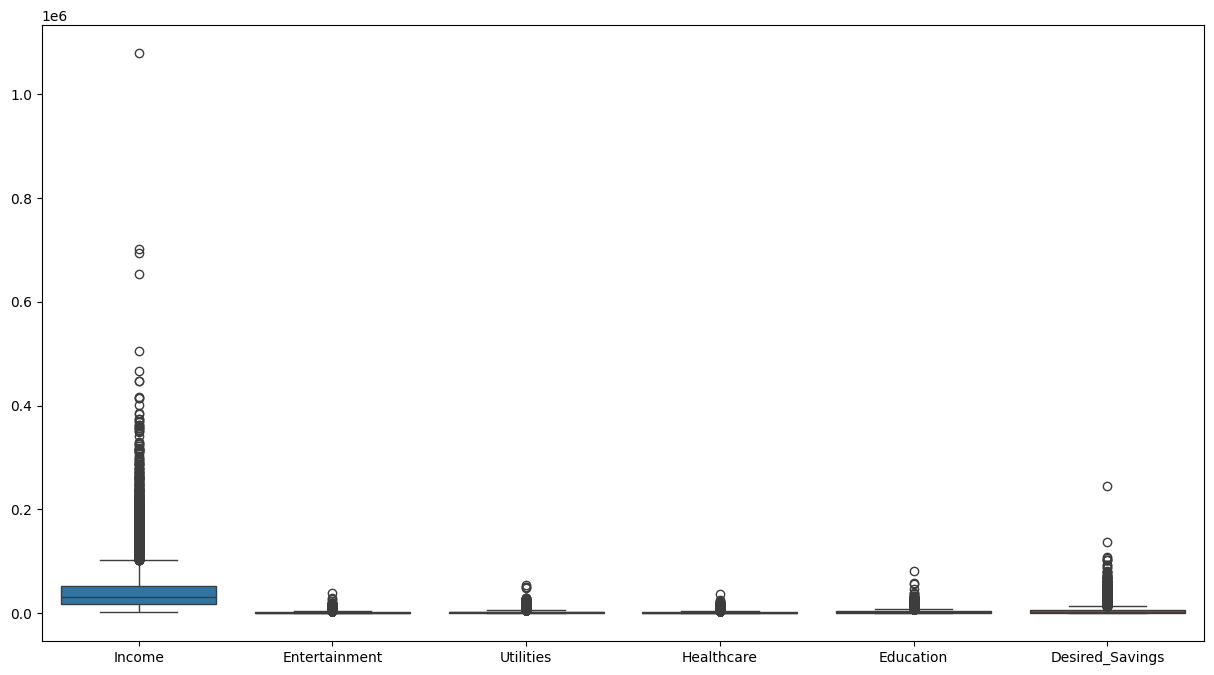

In [27]:
#Boxplot

plt.figure(figsize=(15,8))
sns.boxplot(data=num_df)
plt.show()

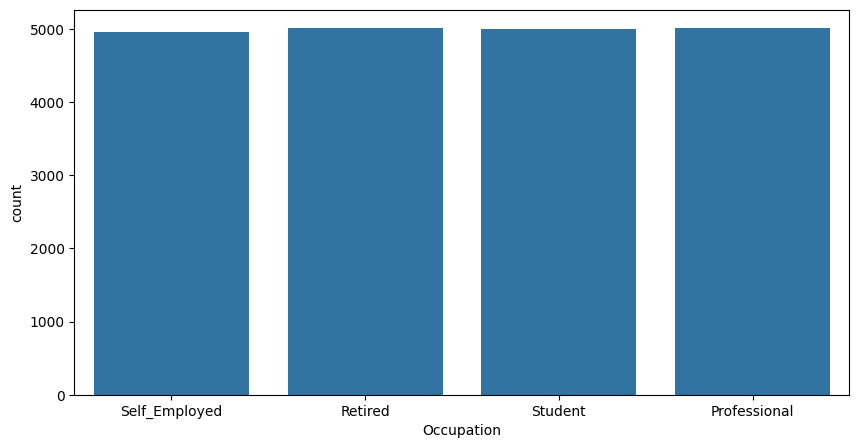

In [37]:
#Count_plot

plt.figure(figsize=(10,5))
sns.countplot(x='Occupation', data=df)
plt.show()